In [ ]:
### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
#Milestone 1-Dataset Download
!pip install yfinance
import yfinance as yf
# Request historical data for past 10 years
data = yf.Ticker("TSLA").history(period='10y')
# Show info
print(data.info())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2012-11-19 00:00:00-05:00 to 2022-11-17 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2518 non-null   float64
 1   High          2518 non-null   float64
 2   Low           2518 non-null   float64
 3   Close         2518 non-null   float64
 4   Volume        2518 non-null   int64  
 5   Dividends     2518 non-null   int64  
 6   Stock Splits  2518 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 221.9 KB
None


In [ ]:
from google.colab import files
import pandas as pd

In [ ]:
df= pd.read_csv (r'/content/TSLA Stock data 10yr.csv') 

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-31,1.846667,1.890000,1.824667,1.875333,1.875333,11628000
1,2012-11-01,1.883333,1.966000,1.880000,1.950000,1.950000,15361500
2,2012-11-02,1.951333,1.970000,1.903333,1.928000,1.928000,15454500
3,2012-11-05,1.986667,2.105333,1.955333,2.100000,2.100000,30733500
4,2012-11-06,2.040667,2.080000,1.996667,2.076667,2.076667,34860000


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2510,2022-10-20,208.279999,215.550003,202.000000,207.279999,207.279999,117798100
2511,2022-10-21,206.419998,214.660004,203.800003,214.440002,214.440002,75529300
2512,2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
2513,2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
2514,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500


In [ ]:
df1=df.reset_index()['High']

In [ ]:
df1

0         1.890000
1         1.966000
2         1.970000
3         2.105333
4         2.080000
           ...    
2510    215.550003
2511    214.660004
2512    213.500000
2513    224.350006
2514    230.600006
Name: High, Length: 2515, dtype: float64

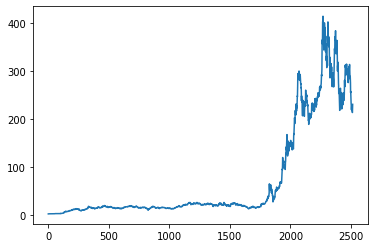

In [ ]:
#%pip install matplotlib
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np

In [ ]:
df1

0         1.890000
1         1.966000
2         1.970000
3         2.105333
4         2.080000
           ...    
2510    215.550003
2511    214.660004
2512    213.500000
2513    224.350006
2514    230.600006
Name: High, Length: 2515, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.00000000e+00],
       [1.84194791e-04],
       [1.93889253e-04],
       ...,
       [5.12861312e-01],
       [5.39157556e-01],
       [5.54305154e-01]])

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1634, 881)

In [ ]:
train_data

array([[0.        ],
       [0.00018419],
       [0.00019389],
       ...,
       [0.03527653],
       [0.03484028],
       [0.03487744]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, n_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-n_step-1):
		a = dataset[i:(i+n_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + n_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

n_step = 100
X_train, y_train = create_dataset(train_data, n_step)
X_test, ytest = create_dataset(test_data, n_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1533, 100)
(1533,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(780, 100)
(780,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the LSTM model
import tensorflow as tf
tf.__version__
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
24/24 [==============================] - 22s 591ms/step - loss: 2.0021e-04 - val_loss: 0.1422
Epoch 2/20
24/24 [==============================] - 10s 408ms/step - loss: 3.8891e-05 - val_loss: 0.0132
Epoch 3/20
24/24 [==============================] - 6s 240ms/step - loss: 1.2407e-05 - val_loss: 0.0243
Epoch 4/20
24/24 [==============================] - 6s 233ms/step - loss: 1.0373e-05 - val_loss: 0.0191
Epoch 5/20
24/24 [==============================] - 5s 211ms/step - loss: 1.0616e-05 - val_loss: 0.0160
Epoch 6/20
24/24 [==============================] - 5s 217ms/step - loss: 1.1275e-05 - val_loss: 0.0171
Epoch 7/20
24/24 [==============================] - 5s 218ms/step - loss: 1.1235e-05 - val_loss: 0.0154
Epoch 8/20
24/24 [==============================] - 5s 212ms/step - loss: 9.6726e-06 - val_loss: 0.0129
Epoch 9/20
24/24 [==============================] - 6s 233ms/step - loss: 1.0503e-05 - val_loss: 0.0132
Epoch 10/20
24/24 [==============================] - 6s 256ms/

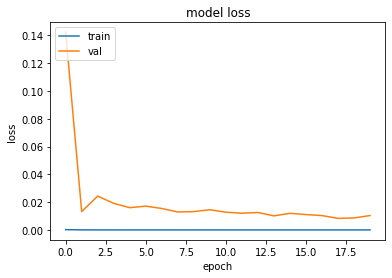

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
def lstm_model(X_train, y_train, history_points):
    tf.random.set_seed(20)
    np.random.seed(10)
    lstm_input = Input(shape=(history_points, 6), name='lstm_input')

    inputs = LSTM(21, name='first_layer')(lstm_input)
    inputs = Dense(1, name='dense_layer')(inputs)
    output = Activation('linear', name='output')(inputs)

    model = Model(inputs=lstm_input, outputs=output)
    adam = optimizers.Adam(lr = 0.0008)
    model.compile(optimizer=adam, loss='mse')
    model.fit(x=X_train, y=y_train, batch_size=15, epochs=170, shuffle=True, validation_split = 0.1)

    return model

In [ ]:
###prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

25/25 [==============================] - 1s 43ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

17.2228886624028

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

186.6724507980528

In [ ]:
#Model Evaluation
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - ytest)**2)
rmse

25/25 [==============================] - 1s 37ms/step


164.3879110268887

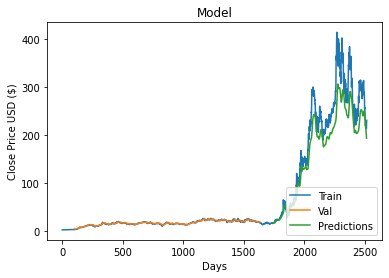

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

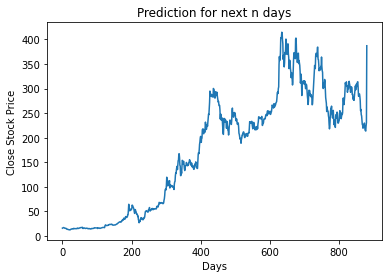

In [ ]:
import sklearn
import numpy as np
original_price = df['Close'].values
x_input=original_price[len(original_price)-30:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=30
i=0
while(i<30):

  if(len(temp_input)>30):
    #print(temp_input)
     x_input=np.array(temp_input[1:])
     x_input=x_input.reshape(1,-1)
     x_input=x_input.reshape((1,n_steps,1))
     yhat=model.predict(x_input,verbose=0)
     temp_input.extend(yhat[0].tolist())
     temp_input=temp_input[1:]
     lst_output.extend(yhat[0].tolist())
     i=i+1
  else:
     x_input=x_input.reshape(1,n_steps,1)
     yhat=model.predict(x_input,verbose=0)
     #print(yhat[0])
     temp_input.extend(yhat[0].tolist())
     #print(len(temp_input))
     lst_output.extend(yhat.tolist())
     i=i+1
     df1=test_data.tolist()
     df1.extend(lst_output)
     df1=scaler.inverse_transform(df1).tolist()
     plt.title('Prediction for next n days')
     plt.ylabel('Close Stock Price')
     plt.xlabel('Days')
     plt.plot(df1)
     fig3=plt.show()